In [39]:
from pbc.bragg_peak import BraggPeak
import math
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import interpolate

In [3]:
with open("bp.csv", 'r') as bp_file:
    data = pd.read_csv(bp_file, sep=';')

x_peak = data[data.columns[0]].as_matrix()
y_peak = data[data.columns[1]].as_matrix()

In [12]:
spl = interpolate.InterpolatedUnivariateSpline(x_peak, y_peak, ext=3)

In [29]:
search_dom = np.arange(0, 30, 0.01)

In [30]:
res = spl(search_dom)

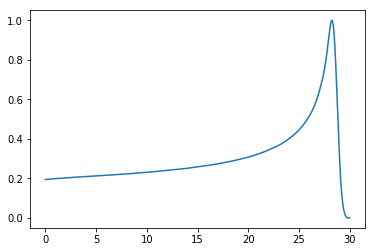

In [31]:
plt.plot(search_dom, res)
plt.show()

In [35]:
a = res[res > 0.9]

In [38]:
len(a)
a[0], a[-1]

(0.90307999999999988, 0.90461999999999743)

In [54]:
print(np.searchsorted(res, 0.8, side="left"))
print(np.searchsorted(res, 0.8, side="right"))

2766
2766


In [80]:
kle = np.extract(res > 0.9, res)
len(kle)

59

In [58]:
res.argmax()

2824

In [92]:
left = res[:res.argmax()]
right = res[res.argmax():]
merge_idx = res.argmax()

In [74]:
idx_left = np.searchsorted(left, 0.9, "left")
idx_left, left[idx_left]

(2791, 0.90307999999999988)

In [75]:
idx_right = np.sea
idx_right, right[idx_right-1]

(176, 0.00011)

In [90]:
i_left = (np.abs(left - 0.9)).argmin()
i_right = (np.abs(right - 0.9)).argmin()
i_left, i_right

(2790, 26)

In [91]:
left[i_left], right[i_right]

(0.8988000000000016, 0.89661999999999997)

In [96]:
res[merge_idx+i_right] == right[i_right]

True

In [112]:
def get_spread_idx(arr, val):
    # ensure we have 2 different points from left and right side of the peak
    left = arr[:arr.argmax()]
    right = arr[arr.argmax():]
    merge_idx = arr.argmax()
    i_left = (np.abs(left - val)).argmin()
    i_right = (np.abs(right - val)).argmin()
    return i_left, merge_idx + i_right, arr[i_left], arr[merge_idx + i_right]

In [116]:
get_spread_idx(res, 0.9)

(2790, 2850, 0.8988000000000016, 0.89661999999999997)